# **Zomato Restaurant Data Analysis**
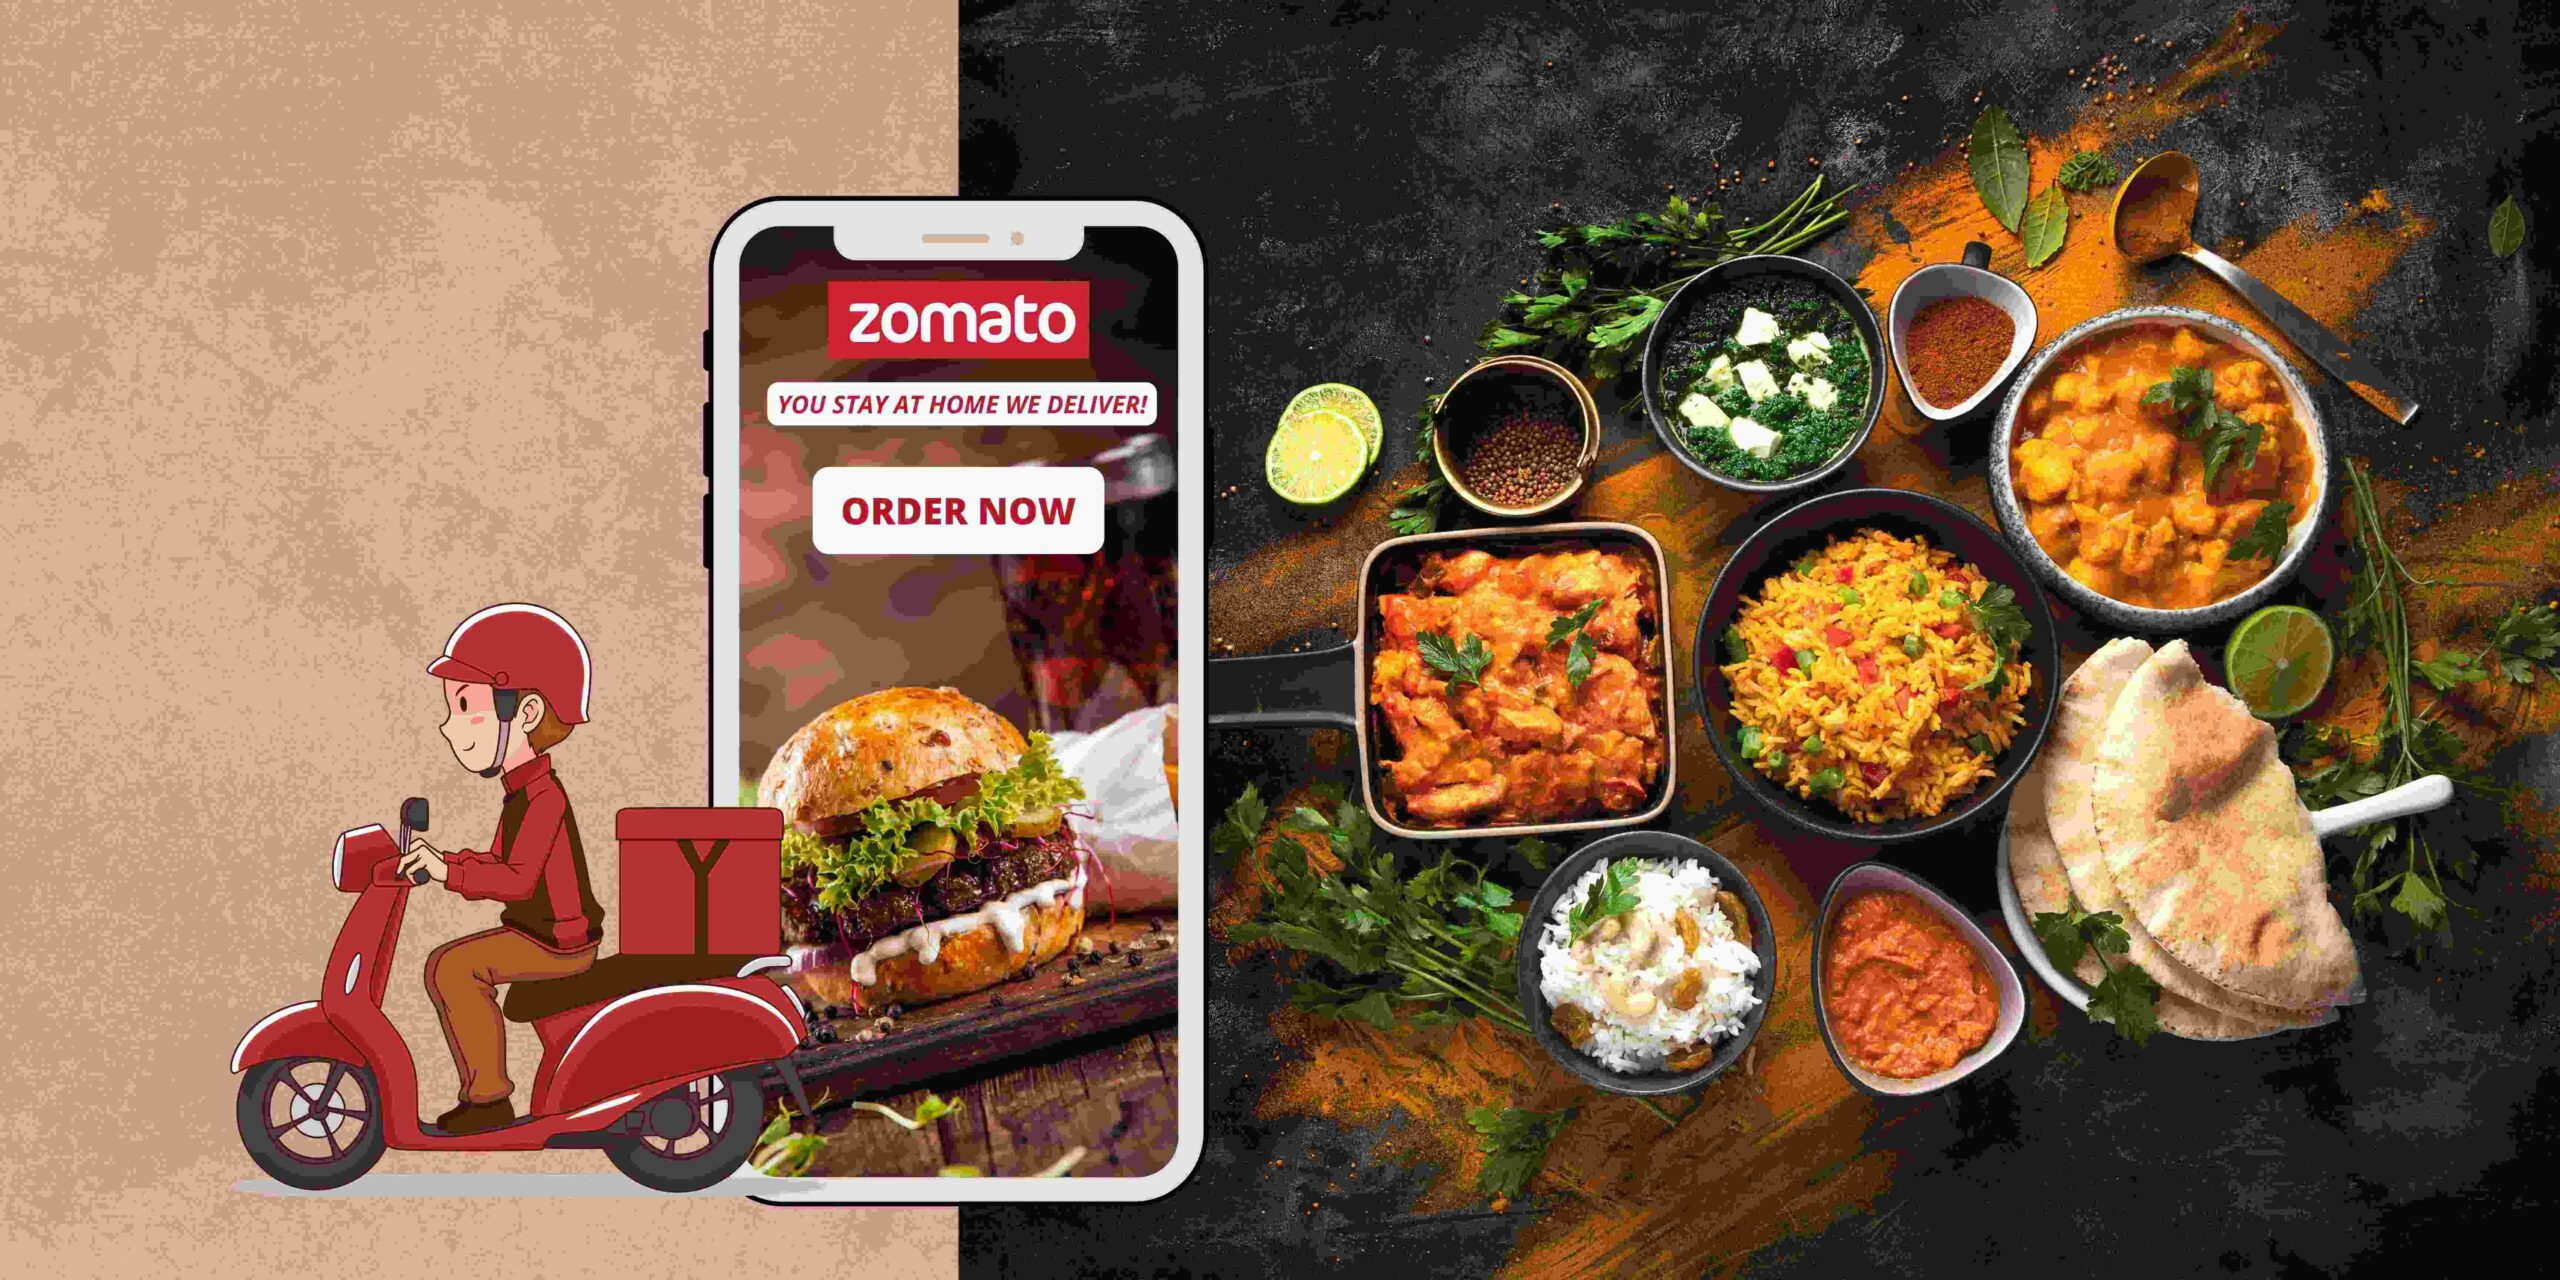

**Objective**:
 Consider Zomato dataset and analyse it in a proper way.

**Expectation**: need to uncover trends related to cost, cuisinnes , customer ratings , online delivery and restaurant locatins.

In [ ]:
#nessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://github.com/Taj1920/Data-Analysis-Datasets/raw/refs/heads/main/Datasets-Practice/zomato_cleaned_data.csv")
df

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type
0,0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800,Buffet
2,2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,others,others,800,Buffet
3,3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51037,51604,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,others,Continental,1500,Pubs and bars
51038,51605,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,others,Finger Food,600,Pubs and bars
51039,51606,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,others,Finger Food,2000,Pubs and bars
51040,51607,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,others,others,Finger Food,2500,Pubs and bars


# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51042 entries, 0 to 51041
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    51042 non-null  int64  
 1   name          51042 non-null  object 
 2   online_order  51042 non-null  object 
 3   book_table    51042 non-null  object 
 4   rate          51042 non-null  float64
 5   votes         51042 non-null  int64  
 6   location      51042 non-null  object 
 7   rest_type     51042 non-null  object 
 8   cuisines      51042 non-null  object 
 9   costfor2      51042 non-null  int64  
 10  type          51042 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 4.3+ MB


In [ ]:
#drop the unnamed column
df=df.drop("Unnamed: 0",axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


In [ ]:
df['rate']=df['rate'].replace(['NEW','-'],None)
# Convert to float and round to 1 decimal
df['rate'] = pd.to_numeric(df['rate'], errors='coerce').round(1)

# Convert back to string so values like 4 → 4.0
df['rate'] = df['rate'].astype(str)

df["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [ ]:
df["rest_type"].unique()

array(['Casual Dining', 'others', 'Quick Bites', 'Cafe', 'Delivery',
       'Dessert Parlor', 'Bakery', 'Takeaway, Delivery',
       'Casual Dining, Bar'], dtype=object)

In [ ]:
#converting object datatype to float datatype for rate
df["rate"]=pd.to_numeric(df["rate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51042 entries, 0 to 51041
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  object 
 2   book_table    51042 non-null  object 
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   costfor2      51042 non-null  int64  
 9   type          51042 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.9+ MB


# **Data visualization**

In [ ]:
#save cleaned data
df.to_csv("Zomato_Restaurant_Data.csv")
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


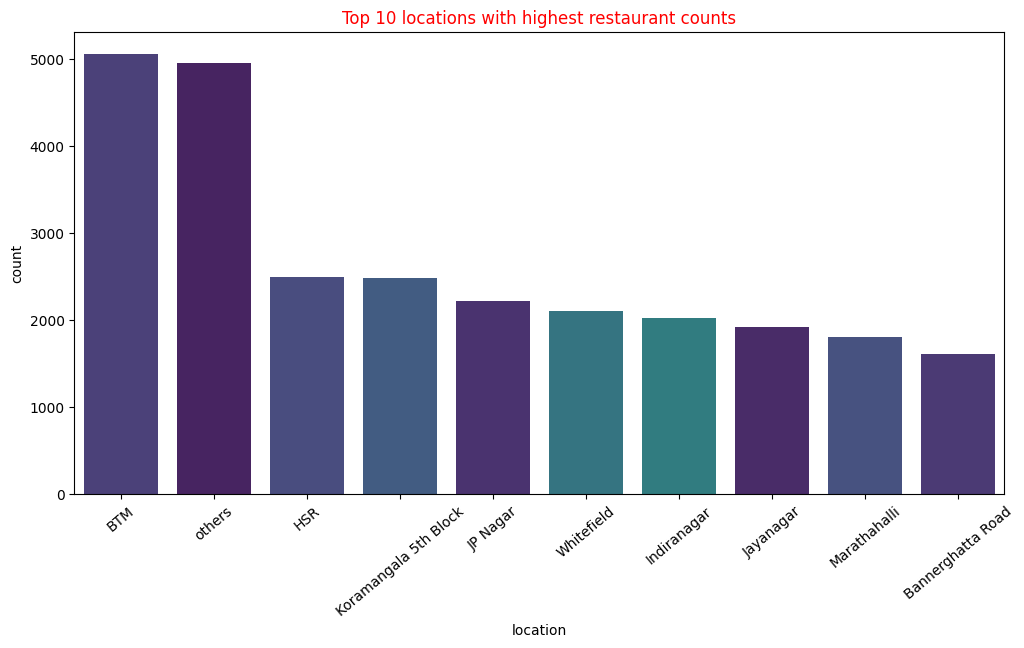

In [ ]:
#Top 10 locations with highest restaurant counts
plt.figure(figsize=(12,6))
sns.countplot(x='location',data=df,order=df['location'].value_counts().head(10).index,hue="location",palette="viridis")
plt.title("Top 10 locations with highest restaurant counts",color="red")
plt.xticks(rotation=40)
plt.show()

**BTM, others, HSR , Koramangala 5th block, JP nagar, whitefield , Indiranager, Jayanagar, Marathahalli, Bannerghatta road** this are the top 10 restaurant

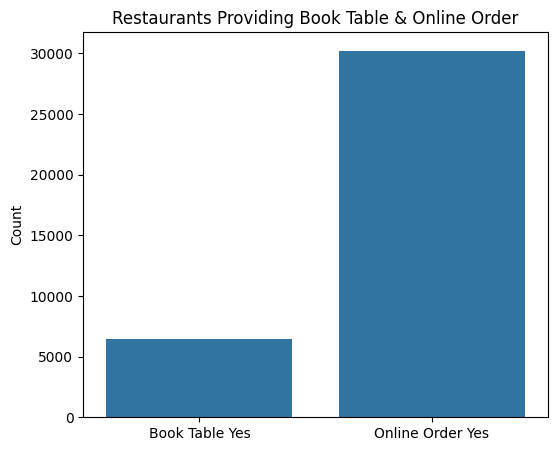

In [ ]:
#count of restaurant with book table and online order facility
counts = [df['book_table'].value_counts()['Yes'],
          df['online_order'].value_counts()['Yes']]
labels = ['Book Table Yes', 'Online Order Yes']
plt.figure(figsize=(6,5))
sns.barplot(x=labels, y=counts)
plt.ylabel("Count")
plt.title("Restaurants Providing Book Table & Online Order")
plt.show()

**people are ordering Online more then the book table**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


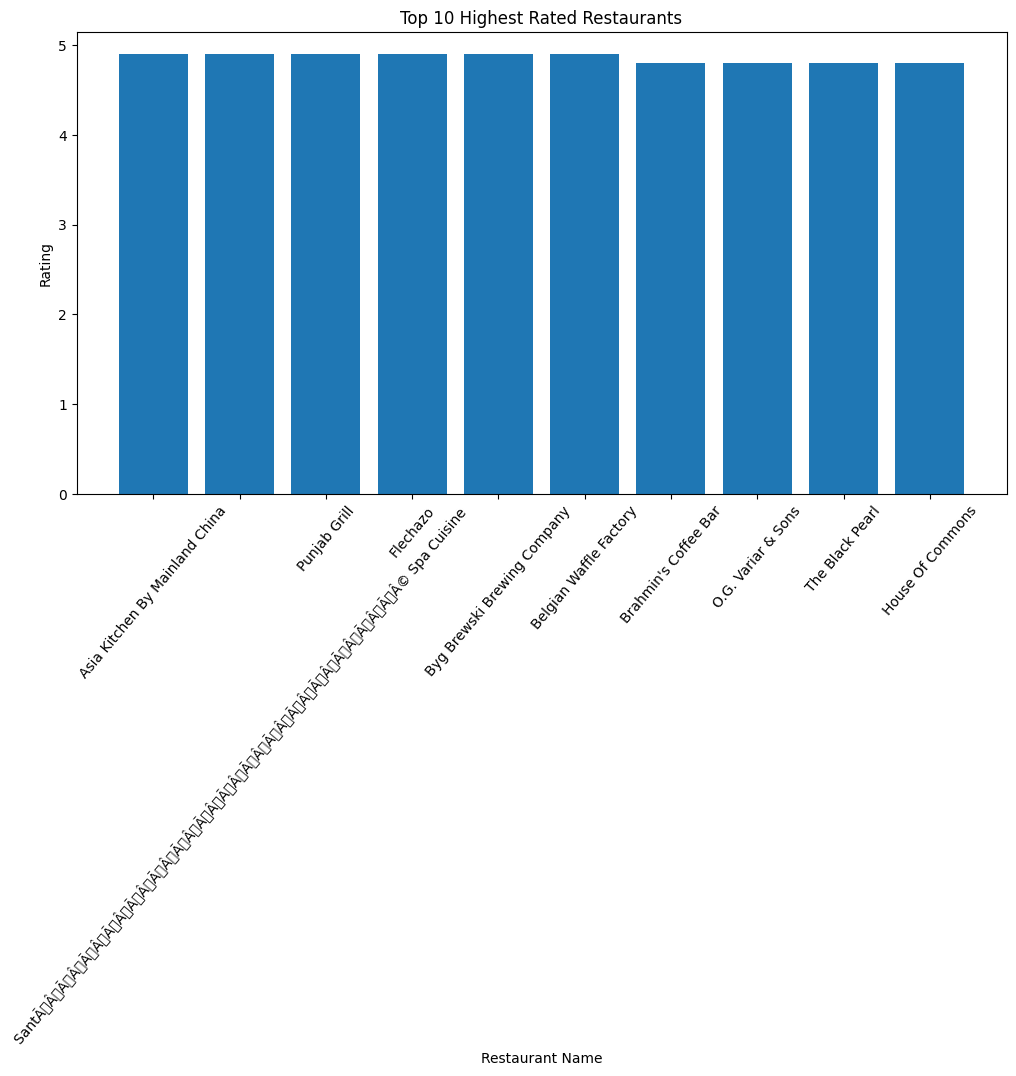

In [ ]:
#Top 10 highest rated restaurants
top_rated = df.drop_duplicates(subset='name').sort_values(by='rate', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_rated['name'], top_rated['rate'])
plt.title("Top 10 Highest Rated Restaurants")
plt.xlabel("Restaurant Name")
plt.ylabel("Rating")

plt.xticks(rotation=50)
plt.show()

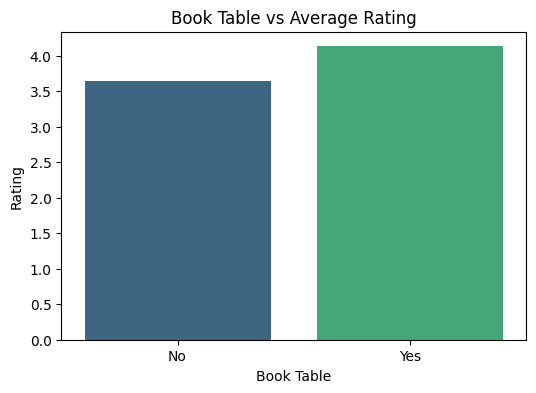

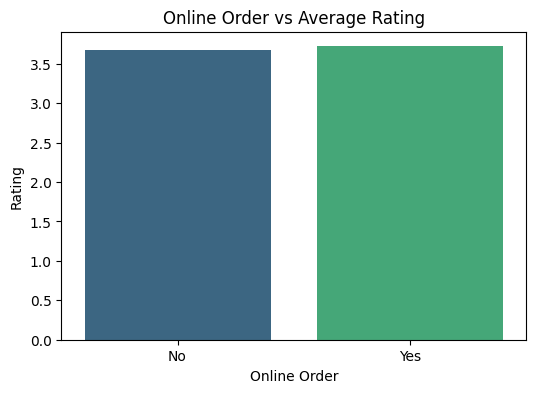

In [ ]:
#Book Table vs Rating | Online Order vs Rating
plt.figure(figsize=(6,4))
rating = df.groupby('book_table')['rate'].mean()
rating = pd.DataFrame(rating).reset_index()
sns.barplot(x="book_table",y="rate",data=rating,hue="book_table",palette="viridis")
plt.title("Book Table vs Average Rating")
plt.xlabel("Book Table")
plt.ylabel("Rating")
plt.show()

plt.figure(figsize=(6,4))
rating=df.groupby('online_order')['rate'].mean()
rating = pd.DataFrame(rating).reset_index()
sns.barplot(x="online_order",y="rate",data=rating,hue="online_order",palette="viridis")
plt.title("Online Order vs Average Rating")
plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.show()

**Table booking** positively influences ratings — customers prefer it.

**Online ordering** does not strongly affect ratings — dine-in restaurants without online delivery still maintain high ratings.

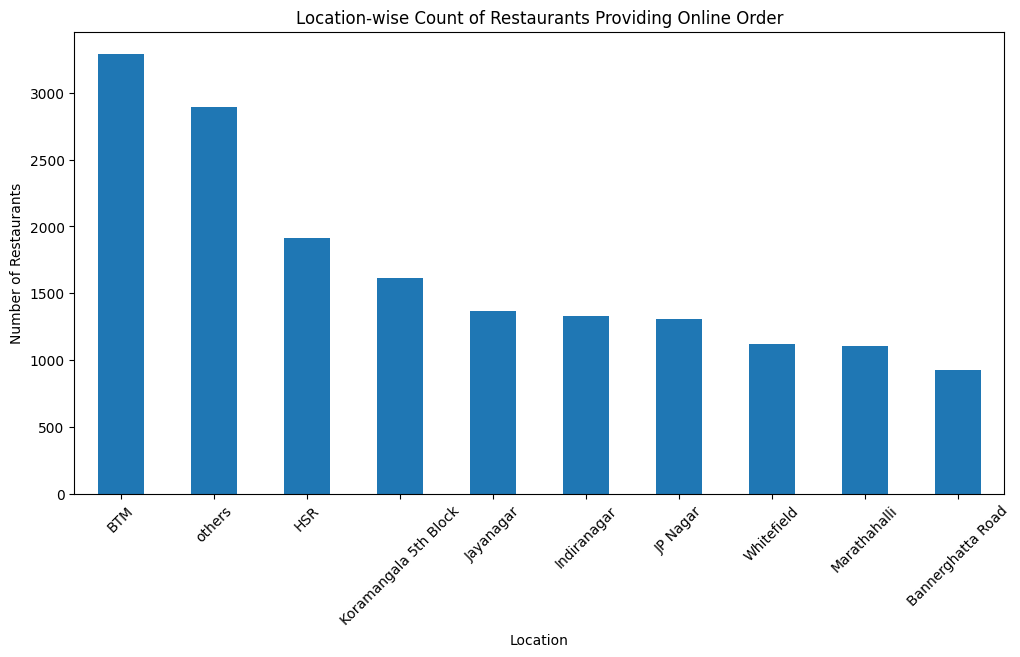

In [ ]:
#Online Order facility location-wise
online_location = df[df['online_order']=='Yes']['location'].value_counts().head(10)
plt.figure(figsize=(12,6))
online_location.plot(kind='bar')
plt.title("Location-wise Count of Restaurants Providing Online Order")
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

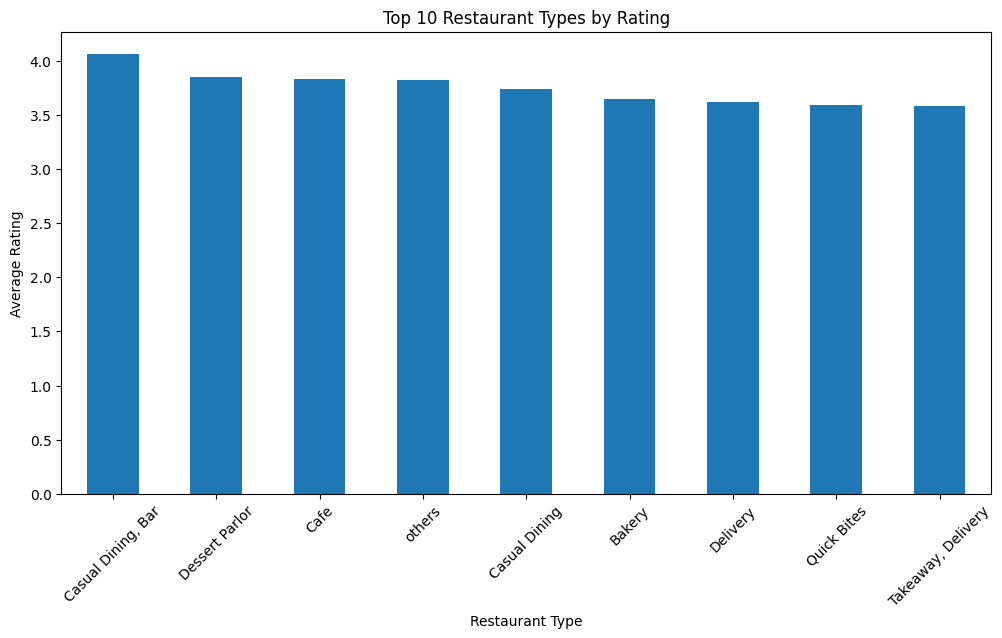

In [ ]:
#Rating by Restaurant Type
rating_rest_type = df.groupby('rest_type')['rate'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
rating_rest_type.plot(kind='bar')
plt.title("Top 10 Restaurant Types by Rating")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

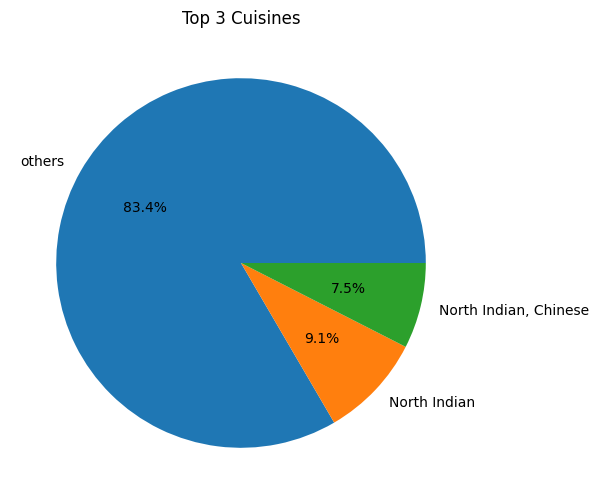

In [ ]:
#Top 3 Cuisines
top_cuisines = df['cuisines'].value_counts().head(3)
plt.figure(figsize=(6,6))
top_cuisines.plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 3 Cuisines")
plt.ylabel("")
plt.show()

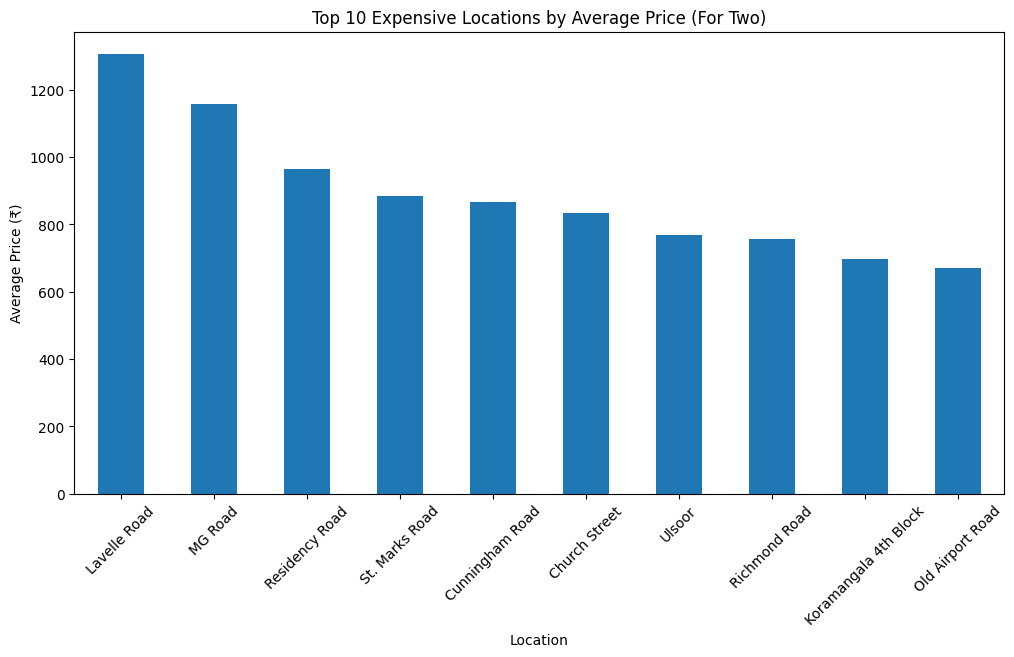

In [ ]:
#Average Price by Location
avg_price = df.groupby('location')['costfor2'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
avg_price.plot(kind='bar')
plt.title("Top 10 Expensive Locations by Average Price (For Two)")
plt.xlabel("Location")
plt.ylabel("Average Price (₹)")
plt.xticks(rotation=45)
plt.show()